PS 1

1. Leverage  = TOTAl INVESTMENT/CAPITAL .
ex:-
our capital = ₹100 but we are using ₹50 , leverage = 0.5 < 1.

If it is < 1 -> it symbolize that  we are using less capital than to our capacity for trade , we are under leveraged.We make low potential profit

but, it might make any sense in financial world because it optimize survival and reduce risk.

Position sizing in trading refers to determining how much of your capital to allocate to a single trade.

so, in backtesting engine it check our trade result for ₹50 in each past trade ,this helps us test that "is our strategy still profitable if I trade small?”, make it low risk.

2. A static stop loss(fixed) is the fixed value  at which the trader decides to exit from the losing trade to prevent the predecided  loss on per trade . ex -
In trending market -> we require manually trail to lock profits.

ex- if we enter at ₹100 ,SL =₹90 , price goes to ₹150 , SL still = ₹90, price falls to ₹90 ,SL = 90 , we exist at 10 loss.

In voilate market -> Trade will stay open through small price jumps,Won’t exit due to minor pullbacks.

while, A  trailing stop loss(dynamic)  is simply a stop order for loss that automaticall  trails the market once the price of a security has initially begun moving in a favorable direction .It moves up as price rises , locking gains.

in trending market -> Trailing Stop-Loss is winner ,
ex- if we enter at ₹100,TSL =₹90 , we price goes to ₹150 , TSL -> ₹140 and if then prices reaches to  ₹140 ,we exists the trade at ₹40 profit .

In voilate market -> Trailing Stop-Loss can trigger too early results in early exit or missed profits in volatile conditions.

3. TTP used to maximize profit while protecting gains ,lock on profit , in trending markets and long trades , Trailing takes profits works very well.As it is just a profit securing tool instead of loss-avoiding , it's behaviour is caputured by trailing stop loss , they work as same , trails on ₹X in market ,TTP as profit , ₹X above from price and TSL for preventing loss, ₹X below price.


4. In small gaps of price , our trade would be continued for a fixed static stop, as Stop-Limit Order do  Not Triggers ex:- if our trade open at ₹100 at first day ,and we set stop-loss at ₹95 and next day if trade opens at ₹90,our astop loss at ₹95 never touches and trade continoues to open.ALso in cases of no buyers or limits at some trade will also not close our trade.

In [136]:
!pip install yfinance

In [137]:
#PS2
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
import seaborn as sns
import random
import matplotlib.pyplot as plt

ticker = ['AAPL']
data = yf.download(ticker, start=dt.datetime(2020, 1, 1), end=dt.datetime(2025, 1, 1))
ohlcv_data = data[['Open', 'High', 'Low', 'Close', 'Volume']].copy()




[*********************100%***********************]  1 of 1 completed


In [138]:
def is_doji(row, threshold=0.1):
    return abs(row['Close'] - row['Open']) <= (row['High'] - row['Low']) * threshold


ohlcv_data['Doji'] = ohlcv_data.apply(is_doji, axis=1)

print(ohlcv_data[ohlcv_data['Doji'] == True])
print("Total Dojis found:", ohlcv_data['Doji'].sum())



Price             Open        High         Low       Close     Volume  Doji
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL      
Date                                                                       
2020-01-03   71.847118   72.676447   71.689957   71.914818  146322800  True
2020-01-10   75.099162   75.599663   74.530960   75.033875  140644800  True
2020-01-15   75.401398   76.283920   74.845282   75.278084  121923600  True
2020-01-29   78.447926   79.270002   77.705637   78.421326  216229200  True
2020-02-14   78.704386   79.004919   78.246327   78.755287   80113600  True
...                ...         ...         ...         ...        ...   ...
2024-11-08  226.623320  228.109740  225.865154  226.413834   38328800  True
2024-11-21  228.329212  229.606130  225.166842  227.970078   42108300  True
2024-12-04  242.285539  243.522560  240.669442  242.425201   44383900  True
2024-12-06  242.325439  244.041301  241.497434  242.255600   36870600  True
2024-12-30  

In [139]:
def is_hammer(row):

    open_price = float(row['Open'])
    close_price = float(row['Close'])
    high = float(row['High'])
    low = float(row['Low'])

    body = abs(close_price - open_price)

    lower_shadow = min(open_price, close_price) - (low)
    upper_shadow = high - max(open_price,close_price)

    if body == 0:
        return False

    return (lower_shadow >= 2 * body) and (upper_shadow <= 0.3 * body)




ohlcv_data['Hammer'] = ohlcv_data.apply(is_hammer, axis=1)

print(ohlcv_data[ohlcv_data['Hammer'] == True])
print("Total Hammers found:", ohlcv_data['Hammer'].sum())

<ipython-input-139-3514873563>:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  open_price = float(row['Open'])
<ipython-input-139-3514873563>:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  close_price = float(row['Close'])
<ipython-input-139-3514873563>:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  high = float(row['High'])
<ipython-input-139-3514873563>:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  low = float(row['Low'])


Price             Open        High         Low       Close     Volume   Doji  \
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL          
Date                                                                           
2020-03-23   55.277748   55.379539   51.528419   54.378586  336752800  False   
2020-07-09   93.573776   93.627240   92.028190   93.078026  125642800  False   
2020-09-22  109.730223  109.905511  106.302374  108.882996  183055400  False   
2022-02-25  161.016399  162.274339  158.097583  162.009003   91974200  False   
2022-05-02  154.009290  155.503083  150.628572  155.237747  123055300  False   
2022-07-21  152.060434  153.113546  149.540859  152.897018   65086600  False   
2022-09-16  149.029128  149.167108  146.230077  148.526474  162278800  False   
2023-02-24  145.450536  145.529635  144.076216  145.055054   55469600  False   
2023-04-10  159.599090  160.202209  158.274210  160.202209   47716900  False   
2023-06-06  178.185948  178.334455  175.

In [140]:
def detect_engulfing(df):
    bullish = []
    bearish = []

    for i in range(1, len(df)):
        prev = df.iloc[i - 1]
        curr = df.iloc[i]

        prev_open = float(prev['Open'])
        prev_close = float(prev['Close'])
        curr_open = float(curr['Open'])
        curr_close = float(curr['Close'])


        if (prev_close < prev_open) and (curr_close > curr_open):
            if (curr_open < prev_close) and (curr_close > prev_open):
                bullish.append(True)
                bearish.append(False)
                continue

        elif (prev_close > prev_open) and (curr_close < curr_open):
            if (curr_open > prev_close) and (curr_close < prev_open):
                bearish.append(True)
                bullish.append(False)
                continue


        bullish.append(False)
        bearish.append(False)


    bullish.insert(0, False)
    bearish.insert(0, False)

    df['Bullish_Engulfing'] = bullish
    df['Bearish_Engulfing'] = bearish
    return df


ohlcv_data = detect_engulfing(ohlcv_data)

print("Bullish Engulfing Patterns Found:", ohlcv_data['Bullish_Engulfing'].sum())
print("Bearish Engulfing Patterns Found:", ohlcv_data['Bearish_Engulfing'].sum())


print(ohlcv_data[ohlcv_data['Bullish_Engulfing'] == True].head())
print(ohlcv_data[ohlcv_data['Bearish_Engulfing'] == True].head())


<ipython-input-140-1072275688>:9: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  prev_open = float(prev['Open'])
<ipython-input-140-1072275688>:10: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  prev_close = float(prev['Close'])
<ipython-input-140-1072275688>:11: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  curr_open = float(curr['Open'])
<ipython-input-140-1072275688>:12: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  curr_close = float(curr['Close'])


Bullish Engulfing Patterns Found: 38
Bearish Engulfing Patterns Found: 50
Price             Open        High         Low       Close     Volume   Doji  \
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL          
Date                                                                           
2020-01-08   71.849540   73.609752   71.849540   73.307518  132079200  False   
2020-05-22   76.737561   77.578406   76.635498   77.495781   81803200  False   
2020-06-01   77.218738   78.336619   77.087507   78.215111   80791200  False   
2020-09-30  110.811196  114.190359  110.645648  112.778313  142675200  False   
2020-11-16  116.006670  118.025958  115.255537  117.352867   91183000  False   

Price      Hammer Bullish_Engulfing Bearish_Engulfing  
Ticker                                                 
Date                                                   
2020-01-08  False              True             False  
2020-05-22  False              True             False  
2020-

In [141]:
def c_win_rate(df,pattern_column, n_days):
    total = 0
    wins = 0

    for idx in range(len(df) - n_days):
        if df[pattern_column].iloc[idx]:
            total += 1
            close_today = df['Close'].iloc[idx].item()
            close_future = df['Close'].iloc[idx + n_days].item()

            if close_future > close_today:
                wins += 1

    win_rate = (wins / total) * 100 if total > 0 else 0
    return round(win_rate, 2), total

In [142]:
for pattern in ['Doji', 'Hammer', 'Bullish_Engulfing','Bearish_Engulfing']:
    for n in [3, 5]:
      if pattern in ohlcv_data.columns:
          rate, total = c_win_rate(ohlcv_data, pattern, n)
          print(f"{pattern} pattern | Lookahead {n} days → Win-Rate: {rate}% out of {total} occurrences")
      else:
            print(f"Column '{pattern}' not found in DataFrame. Skipping win rate calculation.")

Doji pattern | Lookahead 3 days → Win-Rate: 54.62% out of 130 occurrences
Doji pattern | Lookahead 5 days → Win-Rate: 56.15% out of 130 occurrences
Hammer pattern | Lookahead 3 days → Win-Rate: 68.75% out of 16 occurrences
Hammer pattern | Lookahead 5 days → Win-Rate: 68.75% out of 16 occurrences
Bullish_Engulfing pattern | Lookahead 3 days → Win-Rate: 55.26% out of 38 occurrences
Bullish_Engulfing pattern | Lookahead 5 days → Win-Rate: 55.26% out of 38 occurrences
Bearish_Engulfing pattern | Lookahead 3 days → Win-Rate: 66.0% out of 50 occurrences
Bearish_Engulfing pattern | Lookahead 5 days → Win-Rate: 62.0% out of 50 occurrences


In [143]:

def baseline_win_rate(df, n_days, M, seed=42):
    random.seed(seed)
    total = 0
    wins = 0

    valid_indices = list(range(len(df) - n_days))
    sampled_indices = random.sample(valid_indices, M)

    for idx in sampled_indices:
        close_today = df['Close'].iloc[idx].item()
        close_future = df['Close'].iloc[idx + n_days].item()

        total += 1
        if close_future > close_today:
            wins += 1

    win_rate = (wins / total) * 100 if total > 0 else 0
    return round(win_rate, 2)



doji_count = ohlcv_data['Doji'].sum()
hammer_count = ohlcv_data['Hammer'].sum()
engulfing_count = ohlcv_data['Bullish_Engulfing'].sum() + ohlcv_data['Bearish_Engulfing'].sum()


pattern_counts = {
    'Doji': doji_count,
    'Hammer': hammer_count,
    'Engulfing': engulfing_count
}

for pattern, count in pattern_counts.items():
    for n in [3, 5]:
        baseline_winrate = baseline_win_rate(ohlcv_data, n_days=n, M=int(count))
        print(f"Baseline win-rate for {pattern} (n = {n}): {baseline_winrate}%")


Baseline win-rate for Doji (n = 3): 51.15%
Baseline win-rate for Doji (n = 5): 57.25%
Baseline win-rate for Hammer (n = 3): 43.75%
Baseline win-rate for Hammer (n = 5): 68.75%
Baseline win-rate for Engulfing (n = 3): 51.14%
Baseline win-rate for Engulfing (n = 5): 59.09%


In [151]:
n_values = [3, 5]
baseline_rates = {n: None for n in n_values}
pattern_rates = {
    'Doji': {n: None for n in n_values},
    'Hammer': {n: None for n in n_values},
    'Bullish_Engulfing': {n: None for n in n_values},
    'Bearish_Engulfing': {n: None for n in n_values}
}

for pattern in pattern_rates:
    for n in n_values:
        rate, _ = c_win_rate(ohlcv_data, pattern, n)
        pattern_rates[pattern][n] = rate

for n in n_values:
    total_pattern_count = sum(ohlcv_data[pattern].sum() for pattern in pattern_rates)
    baseline_rates[n] = baseline_win_rate(ohlcv_data, n_days=n, M=int(total_pattern_count / len(pattern_rates)))

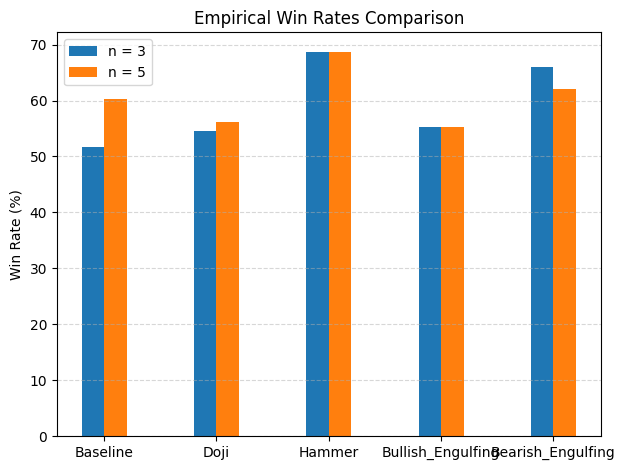

In [166]:

def plot(baseline_rates, pattern_rates, n_values):


    patterns = ['Doji', 'Hammer', 'Bullish_Engulfing','Bearish_Engulfing']
    all_labels = ['Baseline'] + patterns

    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))


    bar_width = 0.35
    x = np.arange(len(all_labels))

    for i, n in enumerate(n_values):
        values = [baseline_rates[n]]
        values.append(pattern_rates['Doji'][n])
        values.append(pattern_rates['Hammer'][n])
        values.append(pattern_rates['Bullish_Engulfing'][n])
        values.append(pattern_rates['Bearish_Engulfing'][n])


        plt.bar(x + i * bar_width, values, width=bar_width, label=f'n = {n}')


    plt.xticks(x + (bar_width * (len(n_values)-1) / 2), all_labels)
    plt.ylabel('Win Rate (%)')
    plt.title('Win Rate  vs Patterns')
    plt.legend()
    plt.ylim(0, 100)
    plt.tight_layout()
    plt.show()


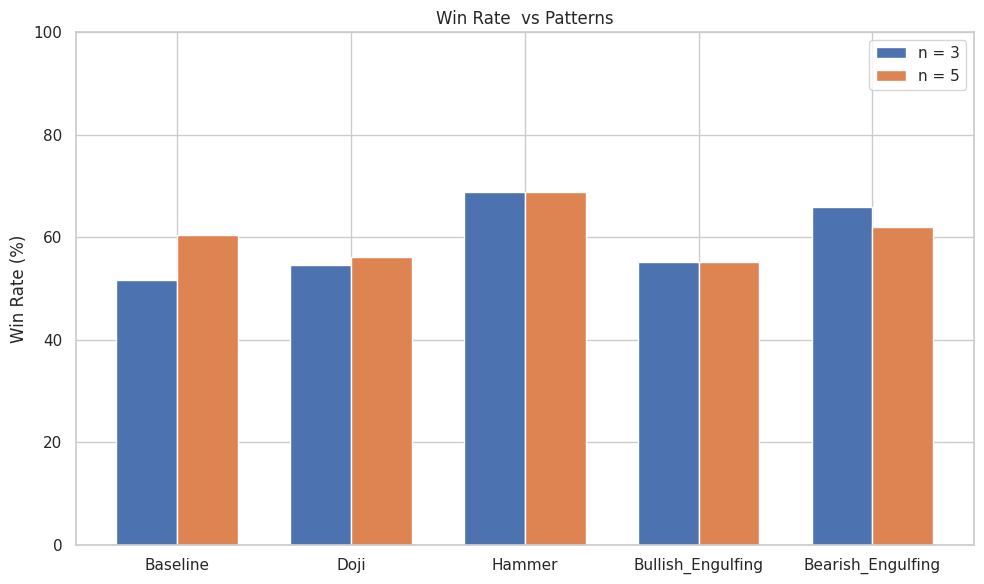

In [167]:
plot(baseline_rates, pattern_rates, n_values)

1. Some patterns might capture some short-term bullish behavior and  seem like they give a better win-rate than the baseline, For ex-  the Hammer and Bullish Engulfing patterns generally showed higher win-rates than the randomly sampled baseline, especially for n = 3. so , they provide a significant edge over the baseline.

2. When we increase n, the win-rates become more volatile,increasing n increase randomness   in price ,

3. The Hammer seems to be the most consistent across both n = 3 and n = 5,because it shows a bullish reversal after a downtrend and trigger short-term buying more reliably than the others